In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt

In [2]:
basePath = 'sims.TNG/TNG100-1/output/'

In [3]:
fields = ['SubhaloMass','SubhaloSFRinRad', 'SubhaloStellarPhotometrics', 'SubhaloMassType']
snapNum = 99
subhalos = il.groupcat.loadSubhalos(basePath, snapNum, fields=fields)

In [4]:
stars = np.log10((subhalos['SubhaloMassType'][:,4])/0.6774) + 10
IDstellarmass = np.nonzero(stars > 9.5)[0]
print(IDstellarmass)

[     0      1      2 ... 727485 738596 752194]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [5]:
#magnitudes
erre = subhalos['SubhaloStellarPhotometrics'][IDstellarmass, 5]
ii = subhalos['SubhaloStellarPhotometrics'][IDstellarmass, 6]

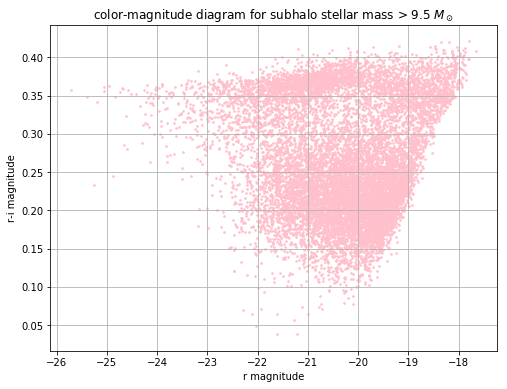

In [6]:
#colormagnitud
plt.figure(figsize=(8,6))
#plt.axis('equal')
plt.title('color-magnitude diagram for subhalo stellar mass > 9.5 $M_\odot$')
plt.scatter(erre, erre-ii, marker='.',s=10, color='pink')
plt.grid()
plt.xlabel('r magnitude')
plt.ylabel('r-i magnitude')
plt.savefig('cmdiagramstellarmass.jpg')

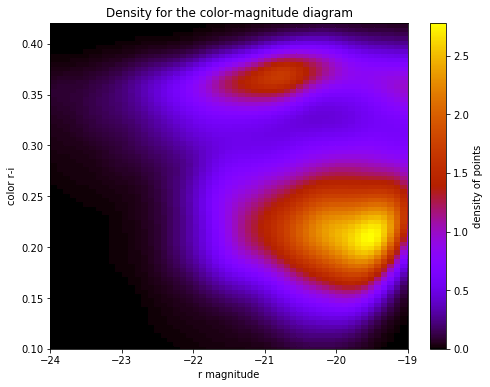

In [7]:
from scipy.stats import kde
 
plt.figure(figsize=(8,6))
plt.title('Density for the color-magnitude diagram')
# create data
x = erre
y = erre-ii
plt.xlabel('r magnitude')
plt.xlim(-24, -19)
plt.ylim(0.10, y.max())
plt.ylabel('color r-i')
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=90
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='gnuplot')
plt.colorbar(label='density of points')
plt.savefig('cmdensitymagnitude.jpg')
plt.show()



In [8]:
masita = np.log10((subhalos['SubhaloMassType'][IDstellarmass,4])/0.6774) + 10
masita2 = subhalos['SubhaloMassType'][IDstellarmass,4] #hice esto para ver que tan diferente era

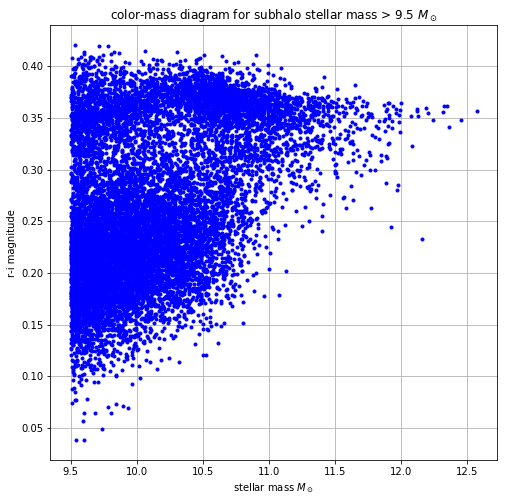

In [9]:
plt.figure(figsize=(8,8))
plt.title('color-mass diagram for subhalo stellar mass > 9.5 $M_\odot$')
plt.plot(masita, erre-ii, '.', color='blue')
plt.grid()
plt.xlabel('stellar mass $M_\odot$')
plt.ylabel('r-i magnitude')
plt.savefig('cmassdiagramstellarmass.jpg')

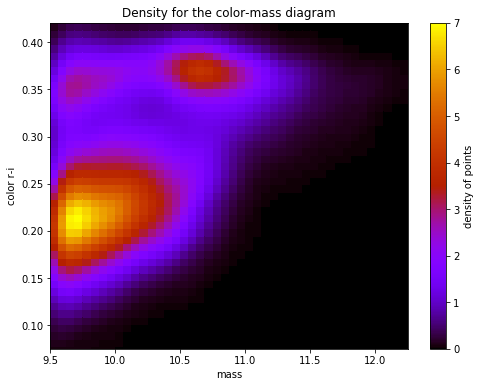

In [10]:
from scipy.stats import kde
 
plt.figure(figsize=(8,6))
plt.title('Density for the color-mass diagram')
# create data
x = masita
y = erre - ii
plt.xlabel('mass')
plt.ylabel('color r-i')
plt.xlim(9.5,12.25)
plt.ylim(0.075, y.max())
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=50
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='gnuplot')
plt.colorbar(label='density of points')
plt.savefig('cmdensitystellarmass.jpg')
plt.show()
